                 Ensemble Techniques Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import seaborn as sns
sns.set(color_codes=True)# Adding nice back ground to the graphs
import scipy.stats       as stats

• DOMAIN: Telecom
• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.
• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
• Customers who left within the last month – the column is called Churn
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents
• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.


             1. Data Understanding & Exploration: 

In [2]:
#1.A Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
churn1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
#1.B Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable
churn2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [3]:
churn1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [4]:
churn2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#1.C Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
churn_merge = pd.merge(churn1, churn2, how='outer', on = 'customerID')

In [6]:
#1.D Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
verify_churn1 = churn1[~churn1['customerID'].isin(churn_merge['customerID'])]
verify_churn2 = churn2[~churn2['customerID'].isin(churn_merge['customerID'])]
verify_churn1
verify_churn2

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


              2. Data Cleaning & Analysis:

#### 2.A Impute missing/unexpected values in the DataFrame

In [7]:
churn_merge = churn_merge.replace(' ',0)

In [8]:
churn_merge

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
churn_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 2.B Make sure all the variables with continuous values are of ‘Float’ type.

From the info of merged data frame, we can understand that 2 columns with continous values,ie TotalCharges and MonthlyCharges, and MonthlyCharges are already in float format.Total charges should follow float type, but Total charges are of object type now.

In [10]:
#convert object data type to float
churn_merge["TotalCharges"] = churn_merge.TotalCharges.astype(float)

#### 2.C Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.
Removing columns that is not needed to plot pie chart,ie,MonthlyCharges,tenure,TotalCharges.


churn_merge_new.info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

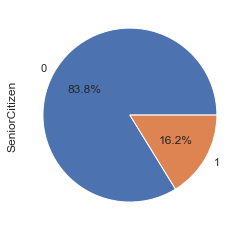

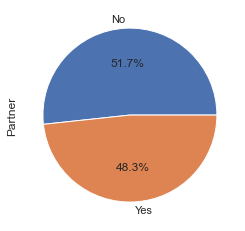

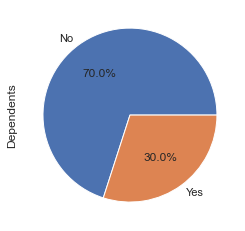

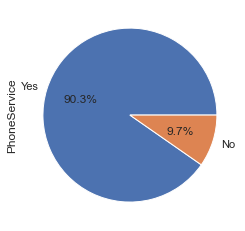

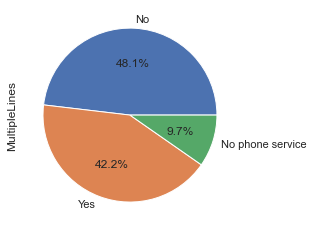

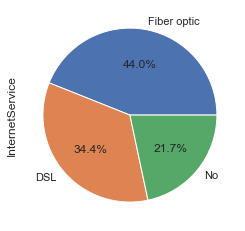

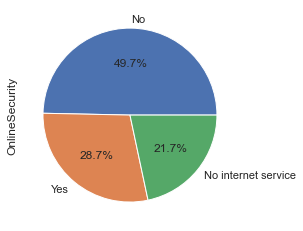

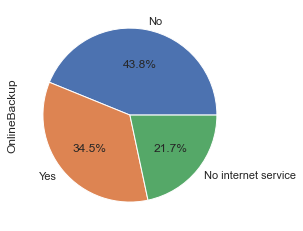

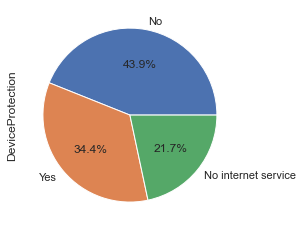

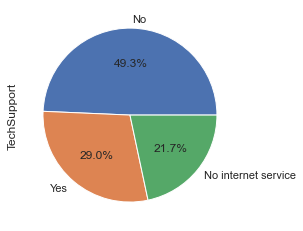

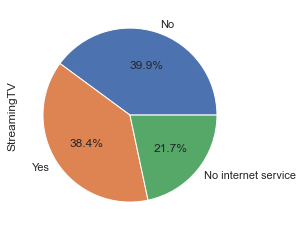

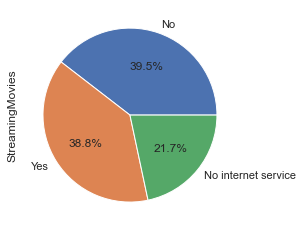

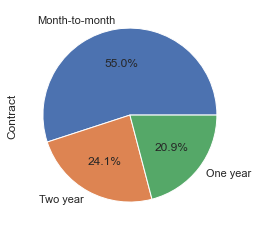

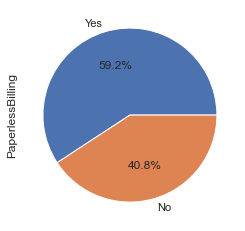

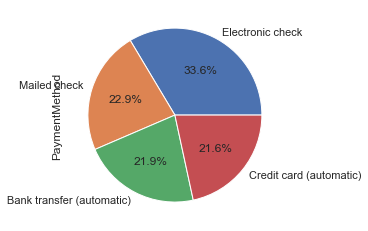

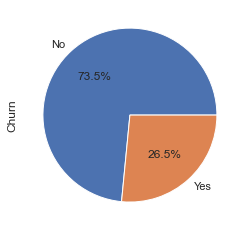

In [11]:
churn_merge_new=churn_merge.copy(deep=True)
print("churn_merge_new.info\n\n")
churn_merge_new.info()
churn_merge_new.drop(['customerID','MonthlyCharges','tenure','TotalCharges'], axis=1,inplace=True)

# ploting categorically pie chart

cols = churn_merge_new.columns 
for i in range(1,len(cols)):    
    churn_merge_new[cols[i]].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()

#### 2.D Share insights for Q2.c.

1)Customer includes equal contributions by male and female. Also aproximately 83% are younger generations

2)50% of the partners also the customer,but most of the dependants are not

3)Most of the customers(90.3%) were done phone service,Also only 42% has multiple lines.

4)21.7% doesnt have internet service where as 34.4% opted DSL and 44% opted fibre optic and it follows same for tech support too

5)50% of the customers don't had online security while 28% had

6)Around 34.5% had online backup while 43.8% doesnt had.It follows same for device protection too

7)TV and movie streaming is almost same which is 38.8%

8)Around 55% customer had monthly contract and yealy and once in two year contract respectively 24% and 20%

9)Most of the customers opted paperless billing which is around 60%

10)All methods of payment are comparable in which electronic check is in slightly higher end

11)one third of the customer had churning while 75% sticked

#### 2.E Encode all the appropriate Categorical features with the best suitable approach.

In [12]:

label_encoding_columns =['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn','Contract','InternetService','MultipleLines','PaymentMethod']
# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        churn_merge_new[column] = churn_merge_new[column].map({'Female': 1, 'Male': 0})
    elif column == 'Contract':
        churn_merge_new[column] = churn_merge_new[column].map({'One year': 1,'Month-to-month': 0,  'Two year': 2})
    elif column == 'MultipleLines': 
        churn_merge_new[column] = churn_merge_new[column].map({'Yes': 1, 'No': 0, 'No phone service': 2}) 
    elif column == 'InternetService':
        churn_merge_new[column] = churn_merge_new[column].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})
    elif column == 'PaymentMethod':
         churn_merge_new[column] = churn_merge_new[column].map({'Credit card (automatic)': 1, 'Bank transfer (automatic)': 0, 'Mailed check': 2,'Electronic check': 3})
    else: 
        churn_merge_new[column] = churn_merge_new[column].map({'Yes': 1, 'No': 0}) 

print("churn_merge_new")
churn_merge_new

churn_merge_new


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,0,0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0,1,3,0
1,0,0,0,0,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1,0,2,0
2,0,0,0,0,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,2,1
3,0,0,0,0,0,2,1,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0
4,1,0,0,0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1,1,2,0
7039,1,0,1,1,1,1,2,0.0,1.0,1.0,0.0,1.0,1.0,1,1,1,0
7040,1,0,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,3,0
7041,0,1,1,0,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2,1


#### 2.F Split the data into 80% train and 20% test
When learning a dependence from data, to avoid overfitting, it is important to divide the data into the training set and the testing set. We first train our model on the training set, and then we use the data from the testing set to gauge the accuracy of the resulting model.

x_train : The training part of the first sequence ( x ) 
x_test : The test part of the first sequence ( x ) 
y_train : The training part of the second sequence ( y ) 
y_test : The test part of the second sequence ( y )

In [13]:
X = churn_merge_new.iloc[:, :-1]
y = churn_merge_new.iloc[:, -1]

#B. Split data into train and test with 80:20 proportion

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5634, 16) (5634,)
(1409, 16) (1409,)


#### 2.G Normalize/Standardize the data with the best suitable approach. 
Machine learning algorithms expect data in the form of features and labels. The features are used to train the model against the ground truth labels. Our feature set consists of all the columns except the “churn” column, which contains the labels or the outputs. The following script divides the data into feature and label sets
MinMaxScaler Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [14]:
features=churn_merge_new.drop('Churn',axis=1)
Y=churn_merge_new['Churn']
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)

           3.Model building and Improvement: 

#### 3.A Train a model using XGBoost. Also print best performing parameters along with train and test performance

we will be using the XGboost algorithm for training our machine learning model. The following script creates an object of  XGboost class (i.e. “model”) and trains it using the training set.
 it takes two lines to train the model. The training tests and labels are passed to the fit() method of the model object.

In [15]:
model = XGBClassifier(learning_rate =0.1, n_estimators=100 , random_state=42) 
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
model = XGBClassifier(learning_rate =0.1, n_estimators=100 , random_state=42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred ))  
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.57      0.48      0.52       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.68      1409
weighted avg       0.76      0.77      0.76      1409

0.7693399574166075


now we got the accuracy of 76.93%

#### 3.B Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. 
#1  control model complexity. 
#This includes max_depth , min_child_weight and gamma
#2   add randomness to make training robust to noise. This includes subsample and colsample_bytree .
#when fine-tuning again with changing max_depth ,n_jobs and learning rate as the previous one

In [17]:

model = XGBClassifier(learning_rate =0.08, n_estimators=100, random_state=42) 
model.fit(X_train, y_train)
n_jobs= -1
#nthread=4
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred ))  
print(accuracy_score(y_test, y_pred))

#we get 77.50% as accuracy

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.58      0.49      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

0.7750177430801988


base_score=0.5
booster='gbtree'
callbacks=None,
colsample_bylevel=1
colsample_bynode=1
colsample_bytree=1,
early_stopping_rounds=None
enable_categorical=False,
eval_metric=None
gamma=0
gpu_id=-1
grow_policy='depthwise'
importance_type=None
interaction_constraints=''
learning_rate=0.1
max_bin=256
max_cat_to_onehot=4,
max_delta_step=0
max_depth=6
max_leaves=0
min_child_weight=1
missing=nan
monotone_constraints='()'
n_estimators=100,
n_jobs=0
num_parallel_tree=1
predictor='auto'
random_state=42
reg_alpha=0
reg_lambda=1

                            Part B

    ***steps***
       Gathering data.
       Data pre-processing.
       Researching the model that will be best for the type of data.
       Training and testing the model.
       Evaluation.

1. Gathering Data

2. Data pre-processing.
    1) Missing data
    2) Noisy data
    3) Inconsistent data
    
    Three Types of Data
           1. Numeric e.g. income, age 
           2. Categorical e.g. gender, nationality
           3. Ordinal e.g. low/medium/high

data pre-processing be performed:
    1. Conversion of data
    2. Ignoring the missing values
    3. Filling the missing values
    4. Machine learning
    5. Outliers detection

3. Researching the model that will be best for the type of data

Supervised Learning:
    Classification:
        K-Nearest Neighbor
        Naive Bayes
        Decision Trees/Random Forest
        Support Vector Machine
        Logistic Regression
    Regression:
        Linear Regression
        Support Vector Regression
        Decision Tress/Random Forest
        Gaussian Progresses Regression
        Ensemble Methods
Unsupervised Learning:
    Clustering:
        Gaussian mixtures
        K-Means Clustering
        Boosting
        Hierarchical Clustering
        K-Means Clustering
        Spectral Clustering

4. Training and testing the model on data
        Training data
        Validation data
        Testing data
        
        confusion matrix
        ----------------
            True positives
            True Negatives
            False Positives
            False Negative

5. Evaluation
        To improve the model we might tune the hyper-parameters of the model and try to improve the accuracy and also looking at the confusion matrix to try to increase the number of true positives and true negatives.

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generates the data. The two choices for the name of the dataset are
# 'simple_dataset' and 'square_dataset'
def generate_dataset(dataset_name = "simple_dataset"):
    if dataset_name == "simple_dataset":
        data = pd.DataFrame({
            'x_1': [1.0, 0.0, -1.0, 0.0],
            'x_2': [0.0, 1.0, 0.0, -1.0],
            'y': [0, 1, 1, 0]
        })
    if dataset_name == "square_dataset":
        data = pd.DataFrame({
            'x_1': [1.0, 1.0, -1.0, -1.0, 2.0, 2.0, -2.0, -2.0],
            'x_2': [1.0, -1.0, 1.0, -1.0, 2.0, -2.0, 2.0, -2.0],
            'y': [0,0,0,0,1,1,1,1]
        })
    return data

# Preprocesses the data by splitting it into features and labels
def preprocess_data(data):
    features = np.array(data[data.keys()[:-1]])
    labels = np.array(data[data.keys()[-1]])
    return features, labels

# Trains a perceptron model
def train_perceptron(features, labels):
    model = LogisticRegression()
    model.fit(features, labels)
    return model

# Trains a decision tree model
def train_decision_tree(features, labels):
    model = DecisionTreeClassifier()
    model.fit(features, labels)
    return model

# Trains a support vector machine
def train_svm(features, labels):
    model = SVC()
    model.fit(features, labels)
    return model

# Trains the model. The three choices for the name of the model
# are 'perceptron', 'decision_tree' and "svm"
def train_model(features, labels, model_name="perceptron"):
    if model_name == "perceptron":
        return train_perceptron(features, labels)
    if model_name == "decisiontree":
        return train_decision_tree(features, labels)
    elif model_name == "svm":
        return train_svm(features, labels)
    else:
        return train_perceptron(features, labels)

# Makes predictions using the model and the features
def make_predictions(model, features):
    predictions = model.predict(features)
    return predictions

# Calculates the accuracy of the model on the training dataset
def calculate_accuracy(predictions, labels):
    accuracy = accuracy_score(predictions, labels)
    return accuracy

In [19]:
def generate_train(dataset_name, model_name):
    # Generates the data. The two choices for the name of the dataset are
    # 'simple_dataset' and 'square_dataset'
    data = generate_dataset(dataset_name)
    print(1)

    # Preprocesses the data by splitting it into features and labels
    features, labels = preprocess_data(data)
    print(1)
    # Trains the model. The three choices for the name of the model
    # are 'perceptron', 'decisiontree' and "svm"
    model = train_model(features, labels, model_name)
    print(1)
    # Makes predictions using the model and the features
    predictions = make_predictions(model, features)
    print(1)
    # Calculates the accuracy of the model on the training dataset
    accuracy = calculate_accuracy(predictions, labels)
    print(1)
    # Outputs the predictions and the accuracy of the model
    return predictions, accuracy
    print(1)

In [21]:
generate_train(churn_merge, 'perceptron')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().